### Identitas
Farisa Fikri Mumtaza PYTN-KS20-03

Sumber : https://www.kaggle.com/datasets/new-york-city/nyc-property-sales/

# NYC Property Sales
The dataset used in this project is NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

- BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
- BLOCK; LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
- BUILDING CLASS AT PRESENT and BUILDING CLASS AT TIME OF SALE: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

- Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
- This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

In [1]:
import pandas as pd
import numpy as np
import math
import statistics
import scipy.stats
from scipy import stats

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings

In [2]:
df_nyc = pd.read_csv('nyc-rolling-sales.csv')
df_nyc

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


In [3]:
# Mengganti kolom borough menjadi area
df_nyc.rename(columns={'BOROUGH':'AREA'}, inplace=True )

In [4]:
df_nyc

,Unnamed: 0,AREA,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


"AREA" berisi kode
1. Manhattan
2. Bronx
3. Brooklyn 
4. Queens
5. Staten Island

In [5]:
# Mengganti kode area 1 dengan manhattan, 2 dengan bronx, 3 dengan brooklyn, 4 dengan queens, dan 5 dengan staten islands
df_nyc['AREA'] = df_nyc.AREA.replace({1: "Manhattan", 2: "Bronx", 3: "Brooklyn", 4: "Queens", 5: "Staten Islands"})
df_nyc.head()

,Unnamed: 0,AREA,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [6]:
# Menampilkan statistik deskriptif pada setiap kolom 
df_nyc.describe()

,Unnamed: 0,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [7]:
# Menampilkan 5 data_nyc teratas
df_nyc.head()

,Unnamed: 0,AREA,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [8]:
# Menampilkan 5 data_nyc terbawah
df_nyc.tail()

,Unnamed: 0,AREA,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,Staten Islands,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,Staten Islands,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,Staten Islands,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [9]:
# Mengetahui dimensi dataframe (baris, kolom)
df_nyc.shape

(84548, 22)

In [10]:
# Menghapus kolom Unnamed: 0	dan EASE-MENT
df_nyc.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace=True)
df_nyc.head()

,AREA,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [11]:
# Mengetahui jumlah data yang duplikat 
df_nyc.duplicated().sum()

765

In [12]:
# Menghapus data yang duplikat
df_nyc.drop_duplicates(inplace=True)
print(sum(df_nyc.duplicated()))

0


In [13]:
# Memberikan informasi tentang dataframe (menampilkan jumlh baris dan kolom, jumlah nilai non-null setiap kolom, tipe data setiap kolom, jumlah memori yang digunakan)
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   AREA                            83783 non-null  object
 1   NEIGHBORHOOD                    83783 non-null  object
 2   BUILDING CLASS CATEGORY         83783 non-null  object
 3   TAX CLASS AT PRESENT            83783 non-null  object
 4   BLOCK                           83783 non-null  int64 
 5   LOT                             83783 non-null  int64 
 6   BUILDING CLASS AT PRESENT       83783 non-null  object
 7   ADDRESS                         83783 non-null  object
 8   APARTMENT NUMBER                83783 non-null  object
 9   ZIP CODE                        83783 non-null  int64 
 10  RESIDENTIAL UNITS               83783 non-null  int64 
 11  COMMERCIAL UNITS                83783 non-null  int64 
 12  TOTAL UNITS                     83783 non-null  int

In [14]:
# Tipe data numerik digunakan untuk variabel atau kolom yang memiliki nilai berupa angka atau bilangan
# Mengkonversi tipedata 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE' menjadi numerik
num = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
for col in num:
    df_nyc[col]= pd.to_numeric(df_nyc[col], errors='coerce') #erros='coerce' artinya nilai yang tidak dapat dikonversi akan diubah menjadi nilai NaN
    
# Tipe data category digunakan untuk variabel atau kolom yang memiliki nilai terbatas atau kategori yang sudah ditentukan
# Mengkonversi tipedata 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'AREA' menjadi kategorik
ctg = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE', 'AREA']
for col in ctg:
    df_nyc[col]= df_nyc[col]. astype('category')
    
# Tipe data date atau tanggal digunakan untuk variabel atau kolom yang memiliki nilai berupa tanggal atau waktu
# Mengkonversi tipedata 'SALE DATE'
df_nyc['SALE DATE']= pd.to_datetime(df_nyc['SALE DATE'], errors='coerce')

In [15]:
# Memberikan informasi tentang dataframe (menampilkan jumlh baris dan kolom, jumlah nilai non-null setiap kolom, tipe data setiap kolom, jumlah memori yang digunakan)
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   AREA                            83783 non-null  category      
 1   NEIGHBORHOOD                    83783 non-null  category      
 2   BUILDING CLASS CATEGORY         83783 non-null  category      
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  object        
 7   ADDRESS                         83783 non-null  object        
 8   APARTMENT NUMBER                83783 non-null  object        
 9   ZIP CODE                        83783 non-null  int64         
 10  RESIDENTIAL UNITS               83783 non-null  int64         
 11  COMMERC

In [16]:
# Mengetahui jumlah nilai yang hilang (null atau NaN) pada setiap kolom
df_nyc.isnull().sum()

AREA                                  0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26054
GROSS SQUARE FEET                 27385
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [17]:
# Mengisi nilai kosong
df_nyc['LAND SQUARE FEET'].fillna(df_nyc['LAND SQUARE FEET'].mean(), inplace=True)
df_nyc['GROSS SQUARE FEET'].fillna(df_nyc['GROSS SQUARE FEET'].mean(), inplace=True)
df_nyc['SALE PRICE'].fillna(df_nyc['SALE PRICE'].mean(), inplace=True)

In [18]:
# Mengetahui jumlah nilai hilang (null atau NaN) disetiap kolom
df_nyc.isnull().sum()

AREA                              0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

# Measure of Central Tendency

### Mean : Berapa Luas dan harga rata-rata properti di setiap area?

In [19]:
df_nyc.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].mean()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17624\3909065309.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_nyc.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].mean()


,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
AREA,,,
Bronx,3909.012725,4489.147412,5.946771e+05
Brooklyn,2016.057333,2481.756365,8.410834e+05
Manhattan,4023.711900,6710.692468,2.919586e+06
Queens,4127.604450,3494.728350,9.049718e+05
Staten Islands,7848.918866,2586.936204,7.488526e+05


Data diatas menunjukkan jumlah dari seluruh data dalam kolom land square feet, gross square feet, dan sale price dibagi dengan jumlah data yang ada.

* Area Bronx memiliki rerata land square feet sekitar 3,909.012725, rerata gross square feet sekitar 4,489.147412, dan rerata sale price sekitar $594,677.10.

* Area Brooklyn memiliki rerata land square feet sekitar 2,016.057333, rerata gross square feet sekitar 2,481.756365, dan rerata sale price sekitar $841,083.40.

* Area Manhattan memiliki rerata land square feet sekitar 4,023.711900, rerata gross square feet sekitar 6,710.692468, dan rerata sale price sekitar $2,919,586.00.

* Area Queens memiliki rerata land square feet sekitar 4,127.604450, rerata gross square feet sekitar 3,494.728350, dan rerata sale price sekitar $904,971.80.

* Area Staten Island memiliki rerata land square feet sekitar 7,848.918866, rerata gross square feet sekitar 2,586.936204, dan rerata sale price sekitar $748,852.60.

### Median : Berapa median dari luas dan harga properti disetiap area?

In [20]:
df_nyc.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].median()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17624\962144914.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_nyc.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].median()


,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
AREA,,,
Bronx,2375.000000,1764.000000,2.748970e+05
Brooklyn,1800.000000,1520.000000,4.256050e+05
Manhattan,3854.481179,3894.415813,1.280703e+06
Queens,3854.481179,2423.500000,7.400000e+05
Staten Islands,3854.481179,1800.000000,5.600000e+05


Data diatas menggambarkan nilai tengah dari sekelompok data dalam hal ini adalah land square feet, gross square feet, dan sale price yang sudah diurutkan dari yang terkecil hingga yang terbesar

* Area Bronx memiliki nilai tengah land square feet sebesar 2,375.00, nilai tengah gross square feet sebesar 1,764.00, dan nilai tengah sale price sekitar $274,897.00.

* Area Brooklyn memiliki nilai tengah land square feet sebesar 1,800.00, nilai tengah gross square feet sebesar 1,520.00, dan nilai tengah sale price sekitar $425,605.00.

* Area Manhattan memiliki nilai tengah land square feet sebesar 3,854.48, nilai tengah gross square feet sebesar 3,894.42, dan nilai tengah sale price sekitar $1,280,703.00.

* Area Queens memiliki nilai tengah land square feet sebesar 3,854.48, nilai tengah gross square feet sebesar 2,423.50, dan nilai tengah sale price sekitar $740,000.00.

* Area Staten Island memiliki nilai tengah land square feet sebesar 3,854.48, nilai tengah gross square feet sebesar 1,800.00, dan nilai tengah sale price sekitar $560,000.00.

### Modus : Bagaimana mayoritas data disetiap area?

In [21]:
df_nyc.groupby('AREA').apply(pd.DataFrame.mode).reset_index(drop=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17624\387565458.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_nyc.groupby('AREA').apply(pd.DataFrame.mode).reset_index(drop=True)


,AREA,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Bronx,RIVERDALE,02 TWO FAMILY DWELLINGS,1,3944,1,D4,2287 JOHNSON AVENUE,,10462,1,0,1,0.000000,0.000000,0,1,D4,0.000000e+00,2017-06-29
1,Brooklyn,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,2135,1,R4,429 KENT AVENUE,,11201,1,0,1,0.000000,0.000000,0,1,R4,0.000000e+00,2016-10-06
2,Manhattan,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,16,1,R4,169 WEST 95TH STREET,,10011,0,0,1,3854.481179,3894.415813,0,2,R4,1.280703e+06,2017-08-07
3,Queens,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,A1,131-05 40TH ROAD,,11354,1,0,1,3854.481179,3894.415813,1920,1,A1,1.280703e+06,2016-11-10
4,Staten Islands,GREAT KILLS,01 ONE FAMILY DWELLINGS,1,2450,1,A5,1235 FOREST HILL ROAD,,10314,1,0,1,3854.481179,3894.415813,1970,1,A5,1.280703e+06,2017-03-01


Data diatas memberikan gambaran tentang atribut-atribut yang paling umum (nilai yang sering muncul) di setiap area, seperti Bronx, Brooklyn, Manhattan, Queens, dan Staten Islands. Atribut-atribut ini mencakup berbagai informasi seperti Neighborhood, Building Class Category, Tax Class At Present, Block, Lot, Building Class At Present, Address, Apartment Number, Zip Code, Residential Units, Commercial Units, Total Units, Land Square Feet, Gross Square Feet, Year Built, Tax Class At Time Of Sale, Building Class At Time Of Sale, Sale Price, dan Sale Date.

# Measure of Spread

### Range : Berapa range dari luas wilayah dan harga setiap area?

In [22]:
# .agg() = aggregate 
range = df_nyc.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].agg(np.ptp)
range

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17624\3041559607.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  range = df_nyc.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].agg(np.ptp)


,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
AREA,,,
Bronx,679000.0,1303935.0,1.100000e+08
Brooklyn,970000.0,1330743.0,3.450000e+08
Manhattan,363912.0,2155267.0,2.210000e+09
Queens,4228293.0,3750365.0,2.575000e+08
Staten Islands,4252225.0,683000.0,1.220000e+08


Data diatas menggambarkan range (nilai selisih antara nilai terbesar dan terkecil dalam suatu data) dari Land Square Feet, Gross Square Feet, Sale Price pada masing masing area.

* Di Area Bronx, land square feet memiliki range 679,000, gross square feet memiliki range 1,303,935, dan sale price memiliki range $110,000,000.

* Di Area Brooklyn, land square feet memiliki range 970,000, gross square feet memiliki range 1,330,743, dan sale price memiliki range $345,000,000.

* Di Area Manhattan, land square feet memiliki range 363,912, gross square feet memiliki range 2,155,267, dan sale price memiliki range $2,210,000,000.

* Di Area Queens, land square feet memiliki range 4,228,293, gross square feet memiliki range 3,750,365, dan sale price memiliki range $257,500,000.

* Di Area Staten Island, land square feet memiliki range 4,252,225, gross square feet memiliki range 683,000, dan sale price memiliki range $122,000,000.

### Variance : Berapa nilai variansi dari luas dan harga setiap area?

In [23]:
df_nyc.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].var()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17624\505332055.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_nyc.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].var()


,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
AREA,,,
Bronx,3.375209e+08,8.683572e+08,7.803693e+12
Brooklyn,7.882877e+07,2.210455e+08,1.561761e+13
Manhattan,2.688551e+07,1.372866e+09,4.634363e+14
Queens,1.397188e+09,1.158215e+09,7.285544e+12
Staten Islands,6.945889e+09,1.559204e+08,2.729078e+12


Data diatas menunjukkan nilai variansi yang mengukur seberapa jauh data tersebar dari nilai rerata pada jenis data Land Square Feet, Gross Square Feet, Sale Price dari masing masing area.

* Area Bronx memiliki variansi land square feet sekitar 3.375209e+08, variansi gross square feet sekitar 8.683572e+08, dan variansi sale price sekitar $7,803,693,000,000.

* Area Brooklyn memiliki variansi land square feet sekitar 7.882877e+07, variansi gross square feet sekitar 2.210455e+08, dan variansi sale price sekitar $1,561,761,000,000,000.

* Area Manhattan memiliki variansi land square feet sekitar 2.688551e+07, variansi gross square feet sekitar 1.372866e+09, dan variansi sale price sekitar $463,436,300,000,000,000.

* Area Queens memiliki variansi land square feet sekitar 1.397188e+09, variansi gross square feet sekitar 1.158215e+09, dan variansi sale price sekitar $7,285,544,000,000,000.

* Area Staten Island memiliki variansi land square feet sekitar 6.945889e+09, variansi gross square feet sekitar 1.559204e+08, dan variansi sale price sekitar $2,729,078,000,000,000.

Variansi yang tinggi dapat menunjukkan variasi yang besar dalam atribut tersebut di wilayah tersebut.

### Standard Deviation : Berapa nilai standar deviasi dari luas dan harga setiap area?

In [24]:
df_nyc.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].std()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17624\2961684198.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_nyc.groupby(['AREA'])[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].std()


,LAND SQUARE FEET,GROSS SQUARE FEET,SALE PRICE
AREA,,,
Bronx,18371.742462,29467.900592,2.793509e+06
Brooklyn,8878.556905,14867.597573,3.951912e+06
Manhattan,5185.123686,37052.201025,2.152757e+07
Queens,37378.974526,34032.558436,2.699175e+06
Staten Islands,83341.999698,12486.809972,1.651992e+06


Data diatas menggambarkan standar deviasi yang mengukur sejauh mana data di setiap area bervariasi dari rerata untuk land square feet, gross square feet, dan sale price. Variansi mengukur sejauh mana titik data tersebar, tetapi tidak memberikan informasi tentang besarnya dispersi dalam satuan yang sama dengan data aslinya. Standar deviasi, yang merupakan akar kuadrat dari variansi, memberikan ukuran yang lebih mudah dimengerti dan dalam satuan yang sama dengan data. 

* Area Bronx: Standar deviasi land square feet sekitar 18,371.74, standar deviasi gross square feet sekitar 29,467.90, dan standar deviasi sale price sekitar $2,793,509.00.

* Area Brooklyn: Standar deviasi land square feet sekitar 8,878.56, standar deviasi gross square feet sekitar 14,867.60, dan standar deviasi sale price sekitar $3,951,912.00.

* Area Manhattan: Standar deviasi land square feet sekitar 5,185.12, standar deviasi gross square feet sekitar 37,052.20, dan standar deviasi sale price sekitar $21,527,570.00.

* Area Queens: Standar deviasi land square feet sekitar 37,378.97, standar deviasi gross square feet sekitar 34,032.56, dan standar deviasi sale price sekitar $2,699,175.00.

* Area Staten Island: Standar deviasi land square feet sekitar 83,342.00, standar deviasi gross square feet sekitar 12,486.81, dan standar deviasi sale price sekitar $1,651,992.00.

# Probability Distribution

### Bagaimana distribusi peluang dari land square feet?

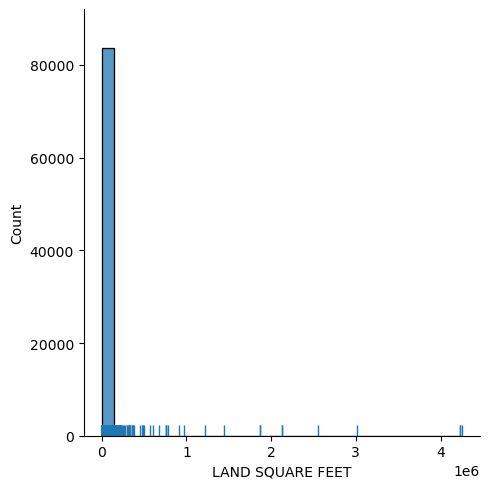

In [25]:
# bins : jumlah kotak yang digunakan untuk mengelompokkan data ke dalam histogram
# rug = True : menampilkan strip plot untuk menunjukkan frekuensi data yang ada pada sumbu x
sns.displot(df_nyc['LAND SQUARE FEET'], bins=30, rug=True)

In [26]:
# data land square feet dihapus terlebih dahulu karen meminiliki nilai kecil.
data_lsf = df_nyc[(df_nyc['LAND SQUARE FEET'] > 10000) & (df_nyc['LAND SQUARE FEET'] < 10000000)]

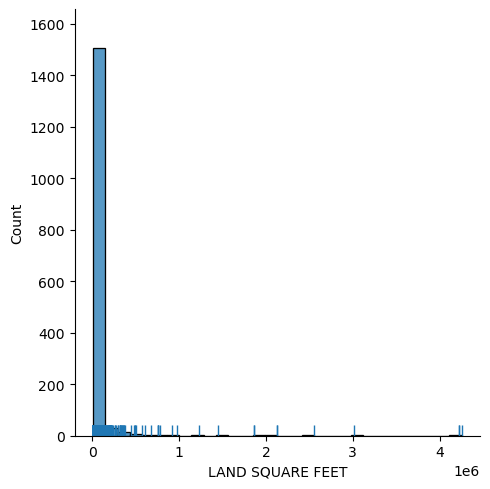

In [27]:
sns.displot(data_lsf['LAND SQUARE FEET'], bins=30, rug=True)

Karena tidak ada perubahan yang terlihat pada plot, langkah yang diambil adalah melakukan normalisasi data melalui transformasi logaritma. Transformasi logaritma dilakukan dengan mengambil logaritma dari seluruh nilai data. Jika terdapat nilai-nilai data yang sangat kecil, maka sebaiknya tambahkan nilai kecil, misalnya 1, sebelum melakukan transformasi logaritma untuk menghindari masalah pembagian oleh nol.

In [28]:
data_lsf['LOG_LSF'] = np.log(data_lsf['LAND SQUARE FEET'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17624\2245630496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_lsf['LOG_LSF'] = np.log(data_lsf['LAND SQUARE FEET'])


<Figure size 1000x2000 with 0 Axes>

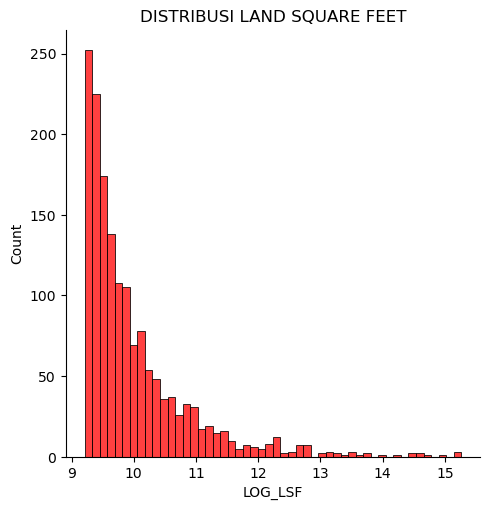

In [29]:
plt.figure(figsize=(10,20))
sns.displot(data_lsf['LOG_LSF'], bins=50, color='red')
plt.title('DISTRIBUSI LAND SQUARE FEET')
plt.show()

Skewness merujuk pada asimetri dalam distribusi data. Sebuah distribusi data disebut memiliki skewness positif ketika ekornya lebih panjang di sisi kanan dan sebagian besar data terletak di sisi kiri distribusi. Sebaliknya, distribusi dikategorikan sebagai skewness negatif jika kondisinya sebaliknya. 

Dalam kasus distribusi di atas, terdapat skewness positif karena ekornya lebih panjang di sisi kanan dan mayoritas titik data terpusat di sisi kiri distribusi.

In [30]:
# Kolmogrov-Smirnov Test
from scipy import stats

lsf = df_nyc['LAND SQUARE FEET']

ks_stat, p_value = stats.kstest(lsf, 'norm') #kstest() merupakan mpdul SciPy untuk melakukan uji Kolmogrov-Smirnov. lsf merupakan kolom yang akan diuji yaitu land square feet

print("KS-statistic:", ks_stat)
print("p-value:", p_value)

KS-statistic: 0.8770872372664236
p-value: 0.0


Uji Kolmogorov-Smirnov adalah metode statistik yang digunakan untuk menguji apakah sampel data dapat dikaitkan dengan suatu distribusi tertentu.

KS-statistic adalah metrik yang mengukur seberapa jauh perbedaan antara distribusi pada kolom "col1" dengan distribusi normal. Semakin besar nilai KS-statistic, semakin besar perbedaan antara keduanya. Nilai p-value menggambarkan probabilitas bahwa distribusi dalam kolom "col1" mengikuti distribusi normal. Jika nilai p-value lebih besar dari tingkat signifikansi (biasanya 0,05), maka dapat dianggap bahwa distribusi dalam kolom "col1" adalah distribusi normal.

Dalam data yang diberikan, KS-statistic memiliki nilai 0.877 dan p-value sebesar 0.0. Karena p-value lebih kecil dari 0.05, maka dapat disimpulkan bahwa distribusi land square feet tidak mengikuti distribusi normal.

# Confidence Intervals

### Berpakah interval kepercayaan dari rerata harga jual area Manhattan?

In [31]:
df_nyc.groupby('AREA').agg({"SALE PRICE": [np.mean, np.std, np.size]})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17624\4238996635.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_nyc.groupby('AREA').agg({"SALE PRICE": [np.mean, np.std, np.size]})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17624\4238996635.py:1: FutureWarning: The provided callable <function mean at 0x0000024DD19D20C0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df_nyc.groupby('AREA').agg({"SALE PRICE": [np.mean, np.std, np.size]})
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17624\4238996635.py:1: FutureWarning: The provided callable <function std at 0x0000024DD19D2200> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable wi

SALE PRICE                     
                        mean           std   size
AREA                                             
Bronx           5.946771e+05  2.793509e+06   6994
Brooklyn        8.410834e+05  3.951912e+06  23843
Manhattan       2.919586e+06  2.152757e+07  18102
Queens          9.049718e+05  2.699175e+06  26548
Staten Islands  7.488526e+05  1.651992e+06   8296

In [32]:
mean_manhattan = 2.919586  # rata-rata harga properti di Manhattan
sd_manhattan = 2.152757 # standar deviasi harga properti di Manhattan
n = 23843 # jumlah properti di Manhattan
z = 1.96 # z-score berdasarkan tabel z
se = sd_manhattan / np.sqrt(n) # menghitung standart eror

# menghitung CI
lower = mean_manhattan - z*se
upper = mean_manhattan + z*se
print("The lower class boundary is", lower)
print("The upper class boundary is", upper)

The lower class boundary is 2.8922603417789614
The upper class boundary is 2.946911658221038


Berdasarkan hasil diatas, kita dapat menyimpulkan bahwa rerata harga jual (sale price) di wilayah Manhattan berada dalam kisaran antara 2.892.260.341.778.9614 hingga 2.946.911.658.221.038 dengan tingkat kepercayaan sebesar 95%.

Artinya, dengan tingkat kepercayaan 95%, kita yakin bahwa rerata harga jual di wilayah Manhattan berada di antara dua angka tersebut. Ini berarti ada 95% peluang bahwa nilai rerata sebenarnya berada dalam rentang ini, sementara 5% sisanya adalah peluang bahwa nilai rerata sesungguhnya mungkin berada di luar rentang ini. 

# Hypothesis Testing

### Apakah Bronx memiliki harga jual rata-rata yang Bronx berbeda secara signifikan daripada Queens?

H0: rata-rata harga jual properti di Bronx sama dengan rata-rata harga jual di Queens

H1: rata-rata harga jual properti di Bronx tidak sama dengan rata-rata harga jual di Queens

In [33]:
#uji z
BX = df_nyc[df_nyc["AREA"] == 'Bronx']
QN = df_nyc[df_nyc["AREA"] == 'Queens']
n_bx= len(BX)
mu_bx = BX["SALE PRICE"].mean()
sd_bx = BX["SALE PRICE"].std()
(n_bx, mu_bx, sd_bx)

(6994, 594677.118387189, 2793509.048576162)

In [34]:
n_qn = len(QN)
mu_qn = QN["SALE PRICE"].mean()
sd_qn = QN["SALE PRICE"].std()
(n_qn, mu_qn, sd_qn)

(26548, 904971.77781585, 2699174.6341400505)

In [35]:
sm.stats.ztest(BX["SALE PRICE"].dropna(),
               QN["SALE PRICE"].dropna(),
              alternative='two-sided')

(-8.490460767005402, 2.0581943098803287e-17)

Hasil uji z adalah -8.490460767005402 dengan p-value sekitar 2.0581943098803287e-17.

Dengan p-value yang sangat rendah (sekitar 2.058e-17), kita dapat menyimpulkan bahwa terdapat bukti yang kuat untuk menolak hipotesis nol (H0). Oleh karena itu, kita menerima hipotesis alternatif (H1), yang mengindikasikan bahwa rata-rata harga jual properti di Bronx berbeda secara signifikan dari rata-rata harga jual properti di Queens. 

Dengan kata lain, Bronx dan Queens memiliki perbedaan yang signifikan dalam harga jual properti mereka.

# Kesimpulan Analisis Data

Dari dataset nyc-rolling-sales yang terdiri dari 84.548 baris dan 22 kolom, dapat ditarik beberapa kesimpulan penting:

1. Rata-rata harga penjualan (sale price) tertinggi terdapat di wilayah Queens (sekitar 904.971,80) dengan rentang harga yang mencapai 257.500.000, sedangkan harga terendah terdapat di wilayah Manhattan (sekitar 2.919.586) dengan rentang harga mencapai 2.210.000.000.

2. Rata-rata harga penjualan properti di seluruh wilayah New York City (NYC) berkisar antara 1.210.154 hingga 1.351.251, dengan tingkat kepercayaan sebesar 95%.

3. Wilayah Staten Island memiliki lahan terluas, sementara wilayah Brooklyn memiliki lahan terkecil.

4. Building class category yang paling umum di wilayah Bronx dan Brooklyn adalah "02 Two Family Dwellings", di wilayah Manhattan adalah "13 Condos-Elevator Apartments", dan di wilayah Queens serta Staten Island adalah "01 One Family Dwellings".

5. Varians Gross Square Feet paling rendah terdapat di Queens, yaitu sekitar 1.158.215.000, dengan standar deviasi sekitar 34.032,56.

6. Distribusi dari luas lahan (land square feet) memiliki skewness positif dan tidak mengikuti distribusi normal.

7. Hasil uji hipotesis menunjukkan bahwa Bronx memiliki rata-rata harga jual properti yang berbeda secara signifikan dari rata-rata harga jual properti di Queens. Dengan p-value sangat rendah (sekitar 2.058e-17), kita dapat menyimpulkan bahwa hipotesis nol (H0) dapat ditolak, dan hipotesis alternatif (H1) diterima. Dengan kata lain, terdapat perbedaan yang signifikan dalam harga jual properti antara Bronx dan Queens.